In [6]:
import tensorflow as tf
from tensorflow import keras

In [8]:
dataset_path = r"Downloads/archive (57)/test"

In [10]:
dataset_path

'Downloads/archive (57)/test'

In [12]:
img_height = 255
img_width = 255

In [14]:
training_data = keras.utils.image_dataset_from_directory(dataset_path, 
                                        subset='training',
                                        seed=42,
                                        image_size=(img_height,img_width),
                                        label_mode='binary',
                                        validation_split=0.20,
                                        batch_size= 64
                                        )
validation_data = keras.utils.image_dataset_from_directory(dataset_path, 
                                        subset='validation',
                                        seed=42,
                                        image_size=(img_height,img_width),
                                        label_mode='binary',
                                        validation_split=0.20,
                                        batch_size= 64
                                        )

Found 97 files belonging to 2 classes.
Using 78 files for training.
Found 97 files belonging to 2 classes.
Using 19 files for validation.


In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = training_data.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_data.map(lambda x, y: (normalization_layer(x), y))

In [19]:
# print class names
training_data.class_names

['apples', 'tomatoes']

In [22]:
model = keras.Sequential([
    # Convolutional layers
    keras.layers.Input(shape = (img_height,img_width,3)),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    # Connecting to the fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    # Last layer for output
    keras.layers.Dense(1, activation ='sigmoid')
])

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(
    training_data,
    validation_data = validation_data,
    epochs = 10
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 67s 12s/step - accuracy: 0.4967 - loss: 361.3354 - val_accuracy: 0.4737 - val_loss: 290.2998
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.5119 - loss: 256.7092 - val_accuracy: 0.5263 - val_loss: 91.1468
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 87s 8s/step - accuracy: 0.5688 - loss: 80.0375 - val_accuracy: 0.4737 - val_loss: 17.6129
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 18s/step - accuracy: 0.4725 - loss: 22.0495 - val_accuracy: 0.5263 - val_loss: 7.2238
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step - accuracy: 0.5911 - loss: 6.3755 - val_accuracy: 0.5263 - val_loss: 5.5276
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.5996 - loss: 4.5903 - val_accuracy: 0.4737 - val_loss: 2.9001
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5308 - loss: 3.5788 - val_accuracy: 0.5789 - val_loss: 1.9225
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6959 - loss: 1.8633 - val_accuracy: 0.6842 - val_loss: 0.9

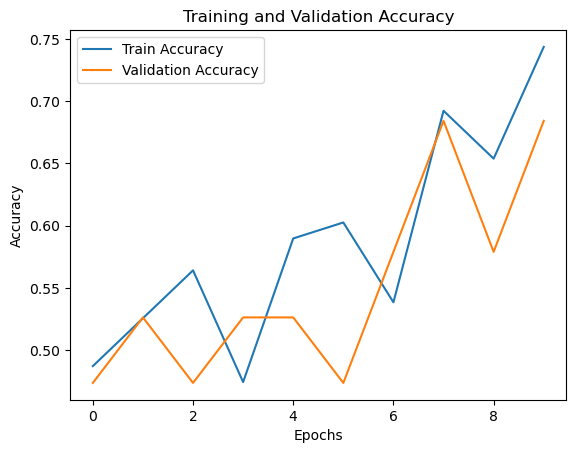

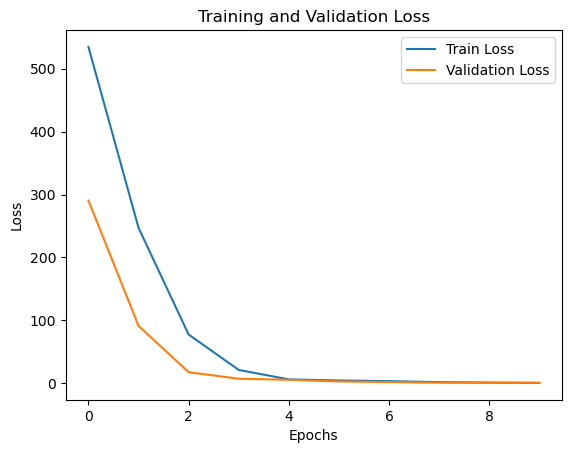

In [28]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [30]:
from PIL import Image
import numpy as np

In [39]:
img = Image.open('Downloads/archive (57)/train/apples/img_p1_10.jpeg').convert('RGB')

In [41]:
img = img.resize((255,255))

In [43]:
img_array = np.array(img) / 255.0

In [45]:
img_array = np.expand_dims(img_array, axis=0)

In [47]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


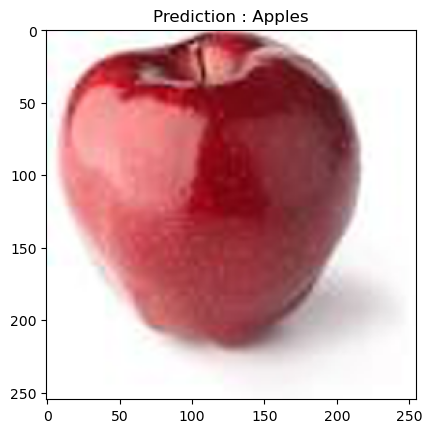

In [53]:
if prediction>0.50:
    plt.imshow(img)
    plt.title('Prediction : Tomatos')
else:
    plt.imshow(img)
    plt.title('Prediction : Apples')